# Pattern replacer for geqo

In [1]:
from geqo.core import Sequence
from geqo.core import BasicGate, InverseBasicGate
from geqo.gates import PauliX, CNOT, Hadamard
from geqo.visualization import plot_latex
from geqo.simulators import ensembleSimulatorSymPy
from geqo.algorithms import (
    Pattern,
    findLongestRunSequence,
    getAllLongestRuns,
    getAllRuns,
)

#### Apply patterns to examples: Eliminate double PauliX
- a sequence of two PauliX gates can be reduced to no gates at all

In [2]:
inputSequence = Sequence([], [0], [(PauliX(), [0]), (PauliX(), [0])])
outputSequence = Sequence([], [0], [])
lambdas = []

pat = Pattern("tester", inputSequence, outputSequence, lambdas)
print(pat)

Pattern #bits/#quits=0/1 and #lamdbas=0


In [3]:
seq = Sequence([], [0], [(PauliX(), [0]), (PauliX(), [0])])
newSeq, subst = pat.replacer(seq)
print("used subst=", subst)
print("newSeq=", newSeq)

check sequence
run ix= 0
set qubits 0 to value 0
res1/res2= True {}
run ix= 1
res1/res2= True {}
res1/res2/resQ/resC= True {} {0: 0} {}
replace_recursion called for Sequence([], [0], [])
used subst= {}
newSeq= Sequence([], [0], [])


#### Replace BasicGates with another one
- we also need a lambda function in the pattern to find the mapping of the setValue things for simulators

In [4]:
inputSequence = Sequence(
    [], [0], [(BasicGate("x1", 1), [0]), (BasicGate("x2", 1), [0])]
)
outputSequence = Sequence(
    [], [0], [(BasicGate("y1", 1), [0]), (BasicGate("x1", 1), [0])]
)
lambdas = [("y1", lambda x1, x2: x1 * x2)]

pat = Pattern("tester2", inputSequence, outputSequence, lambdas)
print(pat)

Pattern #bits/#quits=0/1 and #lamdbas=1


In [5]:
seq = Sequence([], [0], [(BasicGate("a", 1), [0]), (BasicGate("b", 1), [0])])
newSeq, subst = pat.replacer(seq)
print("used subst=", subst)
print("newSeq=", newSeq)

check sequence
run ix= 0
set qubits 0 to value 0
check basic gate
add pattern.name/target.name= x1 a
res1/res2= True {'x1': 'a'}
run ix= 1
check basic gate
add pattern.name/target.name= x2 b
res1/res2= True {'x1': 'a', 'x2': 'b'}
res1/res2/resQ/resC= True {'x1': 'a', 'x2': 'b'} {0: 0} {}
replace_recursion called for Sequence([], [0], [(BasicGate("y1", 1), [0]), (BasicGate("x1", 1), [0])])
replace_recursion called for BasicGate("y1", 1)
replace basic gate
replace_recursion called for BasicGate("x1", 1)
replace basic gate
used subst= {'x1': 'a', 'x2': 'b'}
newSeq= Sequence([], [0], [(BasicGate("y1", 1), [0]), (BasicGate("a", 1), [0])])


#### Apply substitution: the CNOT reverser

In [6]:
inputSequence = Sequence(
    [],
    [0, 1],
    [
        (Hadamard(), [0]),
        (Hadamard(), [1]),
        (CNOT(), [0, 1]),
        (Hadamard(), [0]),
        (Hadamard(), [1]),
    ],
)
outputSequence = Sequence([], [0, 1], [(CNOT(), [1, 0])])
lambdas = []

pat = Pattern("tester3", inputSequence, outputSequence, lambdas)
print(pat)

Pattern #bits/#quits=0/2 and #lamdbas=0


In [7]:
seq = Sequence(
    [],
    [1, 0],
    [
        (Hadamard(), [0]),
        (Hadamard(), [1]),
        (CNOT(), [0, 1]),
        (Hadamard(), [0]),
        (Hadamard(), [1]),
    ],
)
newSeq, subst = pat.replacer(seq)
print("used subst=", subst)
print("newSeq=", newSeq)

check sequence
run ix= 0
set qubits 0 to value 0
res1/res2= True {}
run ix= 1
set qubits 1 to value 1
res1/res2= True {}
run ix= 2
res1/res2= True {}
run ix= 3
res1/res2= True {}
run ix= 4
res1/res2= True {}
res1/res2/resQ/resC= True {} {0: 0, 1: 1} {}
replace_recursion called for Sequence([], [0, 1], [(CNOT(), [1, 0])])
replace_recursion called for CNOT()
used subst= {}
newSeq= Sequence([], [0, 1], [(CNOT(), [1, 0])])


#### Pattern reverse BasicGate and InverseBasicGate

In [8]:
inputSequence = Sequence(
    [], [0], [(BasicGate("X1", 1), [0]), (InverseBasicGate("X1", 1), [0])]
)
outputSequence = Sequence(
    [], [0], [(InverseBasicGate("X1", 1), [0]), (BasicGate("X1", 1), [0])]
)
lambdas = []

pat = Pattern("tester4", inputSequence, outputSequence, lambdas)
print(pat)

Pattern #bits/#quits=0/1 and #lamdbas=0


In [9]:
seq = Sequence(
    [], ["a"], [(BasicGate("u", 1), ["a"]), (InverseBasicGate("u", 1), ["a"])]
)
newSeq, subst = pat.replacer(seq)
print("used subst=", subst)
print("newSeq=", newSeq)

check sequence
run ix= 0
set qubits 0 to value a
check basic gate
add pattern.name/target.name= X1 u
res1/res2= True {'X1': 'u'}
run ix= 1
check basic gate
res1/res2= True {'X1': 'u'}
res1/res2/resQ/resC= True {'X1': 'u'} {0: 'a'} {}
replace_recursion called for Sequence([], [0], [(InverseBasicGate("X1", 1), [0]), (BasicGate("X1", 1), [0])])
replace_recursion called for InverseBasicGate("X1", 1)
replace inverse basic gate
replace_recursion called for BasicGate("X1", 1)
replace basic gate
used subst= {'X1': 'u'}
newSeq= Sequence([], ['a'], [(InverseBasicGate("u", 1), ['a']), (BasicGate("u", 1), ['a'])])


#### Find candidates in a given sequence
- assume that we want to find sub-circuits on two qubits
- if a qubit has a gate with an outsider qubit then it is burned

In [10]:
# The first qubit should lead to two Hadamard gates.
# The second qubit should get burned because of the gate with qubit 2.
seq = Sequence(
    [],
    ["0", "1", "2"],
    [
        (Hadamard(), ["0"]),
        (Hadamard(), ["1"]),
        (CNOT(), ["1", "2"]),
        (Hadamard(), ["0"]),
    ],
)

In [11]:
findLongestRunSequence(seq, 0, ["0", "1"])

(Sequence([], ['0', '1'], [(Hadamard(), ['0']), (Hadamard(), ['1']), (Hadamard(), ['0'])]),
 [0, 1, 3])

#### A more complex example

In [12]:
seq = Sequence(
    [],
    [0, 1, 2, 3],
    [
        (Hadamard(), [0]),
        (CNOT(), [1, 2]),
        (CNOT(), [2, 3]),
        (CNOT(), [0, 2]),
        (Hadamard(), [0]),
        (Hadamard(), [1]),
    ],
)
findLongestRunSequence(seq, 0, [0, 1, 2])

(Sequence([], [0, 1, 2], [(Hadamard(), [0]), (CNOT(), [1, 2]), (Hadamard(), [1])]),
 [0, 1, 5])

#### Automatically apply the reversal pattern with gates in between

In [13]:
inputSequence = Sequence(
    [],
    [0, 1],
    [
        (Hadamard(), [0]),
        (Hadamard(), [1]),
        (CNOT(), [0, 1]),
        (Hadamard(), [0]),
        (Hadamard(), [1]),
    ],
)
outputSequence = Sequence([], [0, 1], [(CNOT(), [1, 0])])
lambdas = []

pat = Pattern("Hadamard upside-down", inputSequence, outputSequence, lambdas)
print(pat)

Pattern #bits/#quits=0/2 and #lamdbas=0


In [14]:
seq = Sequence(
    [],
    ["0", "1", "2", "3"],
    [
        (Hadamard(), ["0"]),
        (Hadamard(), ["2"]),
        (CNOT(), ["1", "3"]),
        (CNOT(), ["0", "2"]),
        (CNOT(), ["3", "1"]),
        (Hadamard(), ["0"]),
        (Hadamard(), ["2"]),
    ],
)
subseq, indexes = findLongestRunSequence(seq, 0, ["0", "2"])

In [15]:
print(subseq)
print(indexes)

Sequence([], ['0', '2'], [(Hadamard(), ['0']), (Hadamard(), ['2']), (CNOT(), ['0', '2']), (Hadamard(), ['0']), (Hadamard(), ['2'])])
[0, 1, 3, 5, 6]


In [16]:
newSeq, subst = pat.replacer(subseq)
print(newSeq)

check sequence
run ix= 0
set qubits 0 to value 0
res1/res2= True {}
run ix= 1
set qubits 1 to value 2
res1/res2= True {}
run ix= 2
res1/res2= True {}
run ix= 3
res1/res2= True {}
run ix= 4
res1/res2= True {}
res1/res2/resQ/resC= True {} {0: '0', 1: '2'} {}
replace_recursion called for Sequence([], [0, 1], [(CNOT(), [1, 0])])
replace_recursion called for CNOT()
Sequence([], ['0', '2'], [(CNOT(), ['2', '0'])])


#### A CNOT reversal operation with other gates between

In [17]:
# The Hadamard conjugation of a CNOT leads to a flipped CNOT.

inputSequence = Sequence(
    [],
    [0, 1],
    [
        (Hadamard(), [0]),
        (Hadamard(), [1]),
        (CNOT(), [0, 1]),
        (Hadamard(), [0]),
        (Hadamard(), [1]),
    ],
)
outputSequence = Sequence([], [0, 1], [(CNOT(), [1, 0])])
lambdas = []

pat = Pattern("Hadamard Upside-Down", inputSequence, outputSequence, lambdas)
print(pat)

Pattern #bits/#quits=0/2 and #lamdbas=0


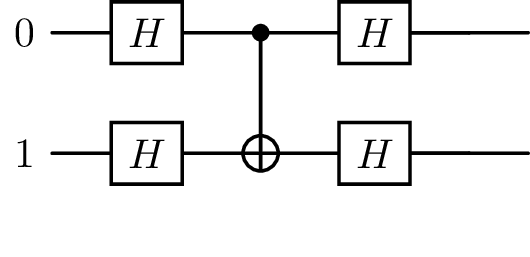

In [18]:
sim = ensembleSimulatorSymPy(0, 3)
plot_latex(inputSequence, backend=sim, greek_symbol=True)

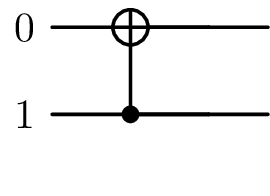

In [19]:
sim = ensembleSimulatorSymPy(0, 3)
plot_latex(outputSequence, backend=sim, greek_symbol=True)

In [20]:
seq = Sequence(
    [],
    ["0", "1", "2", "3"],
    [
        (Hadamard(), ["0"]),
        (Hadamard(), ["2"]),
        (CNOT(), ["1", "3"]),
        (CNOT(), ["3", "1"]),
        (Hadamard(), ["1"]),
        (CNOT(), ["0", "2"]),
        (Hadamard(), ["0"]),
        (Hadamard(), ["3"]),
        (Hadamard(), ["2"]),
    ],
)

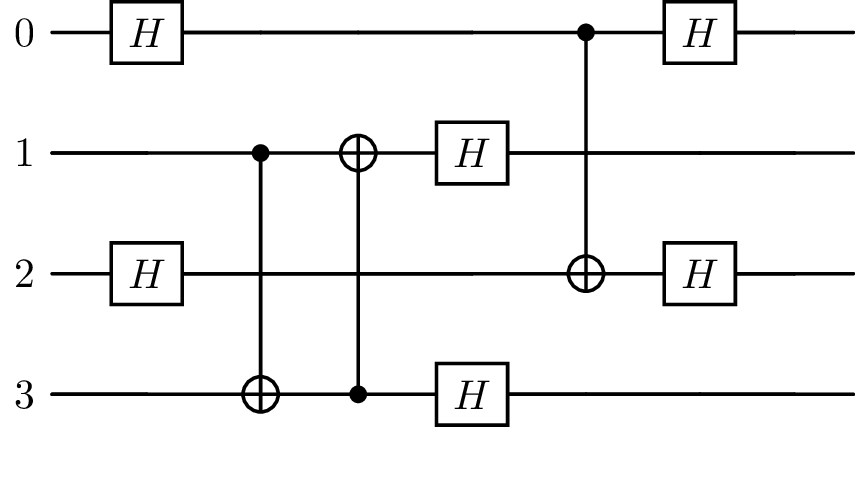

In [21]:
sim = ensembleSimulatorSymPy(0, 3)
plot_latex(seq, backend=sim, greek_symbol=True)

In [22]:
subseq, indexes = findLongestRunSequence(seq, 0, ["0", "2"])
print(subseq)
print(indexes)

Sequence([], ['0', '2'], [(Hadamard(), ['0']), (Hadamard(), ['2']), (CNOT(), ['0', '2']), (Hadamard(), ['0']), (Hadamard(), ['2'])])
[0, 1, 5, 6, 8]


check sequence
run ix= 0
set qubits 0 to value 0
res1/res2= True {}
run ix= 1
set qubits 1 to value 2
res1/res2= True {}
run ix= 2
res1/res2= True {}
run ix= 3
res1/res2= True {}
run ix= 4
res1/res2= True {}
res1/res2/resQ/resC= True {} {0: '0', 1: '2'} {}
replace_recursion called for Sequence([], [0, 1], [(CNOT(), [1, 0])])
replace_recursion called for CNOT()
Sequence([], ['0', '2'], [(CNOT(), ['2', '0'])])
{}


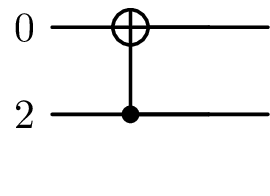

In [23]:
newSeq, subst = pat.replacer(subseq)
print(newSeq)
print(subst)
sim = ensembleSimulatorSymPy(0, 3)
plot_latex(newSeq, backend=sim, greek_symbol=True)

#### Replace the gates in the original sequence directly

we eliminate the indexes: [0, 1, 5, 6, 8]
place in: (CNOT(), ['2', '0'])


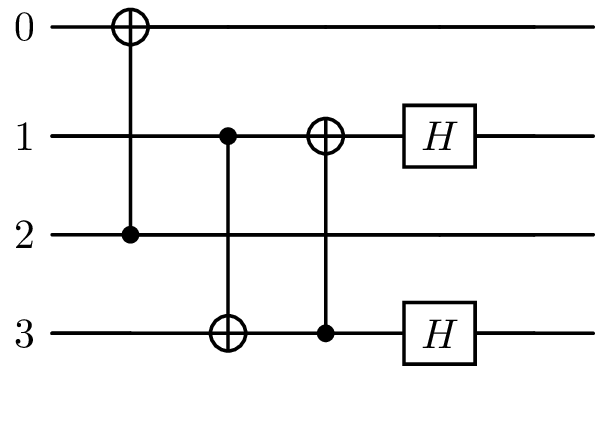

In [24]:
startIndex = 0  # We started here
print("we eliminate the indexes:", indexes)
newGatesAndTargets = []
for gi in range(len(seq.gatesAndTargets)):
    # The first hit with our pattern is replaces
    if gi == min(indexes):
        # We have to place the substitution circuit here.
        for g in newSeq.gatesAndTargets:
            print("place in:", g)
            newGatesAndTargets.append(g)

    if gi not in indexes:
        newGatesAndTargets.append(seq.gatesAndTargets[gi])

replacesSeq = Sequence(seq.bits, seq.qubits, newGatesAndTargets)

sim = ensembleSimulatorSymPy(0, 3)
plot_latex(replacesSeq, backend=sim, greek_symbol=True)

#### Scan a whole circuit for a pattern
- number of qubits and number of gates are relevant

##### Get subsequences of all possible 2-qubit combinations

In [25]:
seq = Sequence(
    [],
    ["0", "1", "2", "3"],
    [
        (Hadamard(), ["0"]),
        (Hadamard(), ["2"]),
        (CNOT(), ["1", "3"]),
        (CNOT(), ["3", "1"]),
        (Hadamard(), ["1"]),
        (CNOT(), ["0", "2"]),
        (Hadamard(), ["0"]),
        (Hadamard(), ["3"]),
        (Hadamard(), ["2"]),
    ],
)
getAllLongestRuns(seq, 2)

[(('0', '1'), [0]),
 (('0', '1'), [4]),
 (('0', '1'), [6]),
 (('0', '2'), [0, 1, 5, 6, 8]),
 (('0', '3'), [0]),
 (('0', '3'), [7]),
 (('1', '2'), [1]),
 (('1', '2'), [4]),
 (('1', '2'), [8]),
 (('1', '3'), [2, 3, 4, 7]),
 (('2', '3'), [1]),
 (('2', '3'), [7]),
 (('2', '3'), [8])]

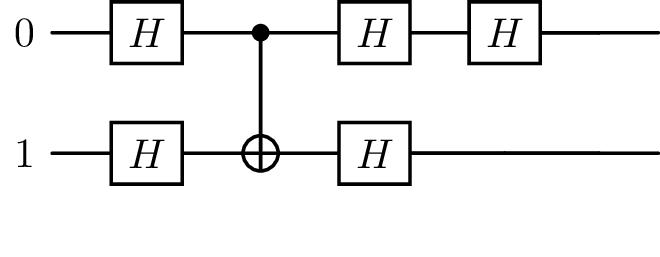

[(('0',), [0]), (('0',), [3, 5]), (('1',), [1]), (('1',), [4])]

In [26]:
seq = Sequence(
    [],
    ["0", "1"],
    [
        (Hadamard(), ["0"]),
        (Hadamard(), ["1"]),
        (CNOT(), ["0", "1"]),
        (Hadamard(), ["0"]),
        (Hadamard(), ["1"]),
        (Hadamard(), ["0"]),
    ],
)
sim = ensembleSimulatorSymPy(0, 3)
plot_latex(seq, backend=sim, greek_symbol=True)
getAllLongestRuns(seq, 1)

##### Get subsequences of a certain length

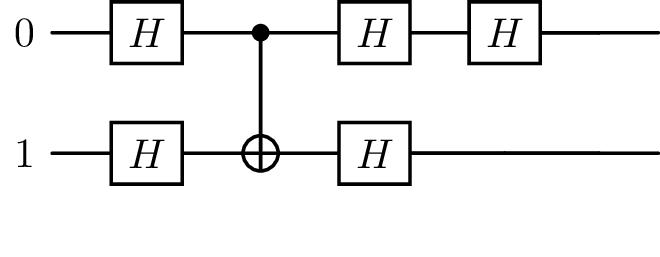

scan qubits ('0', '1')
longest run: [0, 1, 2, 3, 4, 5]
processing candidate (('0', '1'), [0, 1, 2, 3, 4, 5]) len(candGates)/numberGates 6 4
new candidate: (('0', '1'), [0, 1, 2, 3])
new candidate: (('0', '1'), [1, 2, 3, 4])
new candidate: (('0', '1'), [2, 3, 4, 5])


[(('0', '1'), [0, 1, 2, 3]),
 (('0', '1'), [1, 2, 3, 4]),
 (('0', '1'), [2, 3, 4, 5])]

In [27]:
# The same as above, but we can ask for a length of the sub-sequence. For instance, if we have [0,1,2] as max.
# run and we have 2 as number of qubits, we get [0,1] and [1,2] at the end.
seq = Sequence(
    [],
    ["0", "1"],
    [
        (Hadamard(), ["0"]),
        (Hadamard(), ["1"]),
        (CNOT(), ["0", "1"]),
        (Hadamard(), ["0"]),
        (Hadamard(), ["1"]),
        (Hadamard(), ["0"]),
    ],
)
sim = ensembleSimulatorSymPy(0, 3)
plot_latex(seq, backend=sim, greek_symbol=True)
getAllRuns(seq, 2, 4, True)

#### Example: Replacement of Toffoli gates
- a Toffoli gate can be decomposed into single qubit gates (Hadamard, $T$ and $T^\dagger$ gates) and 6 CNOT gates
- for instance, see `https://en.wikipedia.org/wiki/Toffoli_gate#Related_logic_gates`
- as an example, we replace three Toffoli gates step by step

In [28]:
from geqo.gates import Toffoli

inputSequence = Sequence([], [0, 1, 2], [(Toffoli(), [0, 1, 2])])
outputSequence = Sequence(
    [],
    [0, 1, 2],
    [
        (Hadamard(), [2]),
        (CNOT(), [1, 2]),
        (InverseBasicGate("pi4", 1), [2]),
        (CNOT(), [0, 2]),
        (BasicGate("pi4", 1), [2]),
        (CNOT(), [1, 2]),
        (InverseBasicGate("pi4", 1), [2]),
        (CNOT(), [0, 2]),
        (BasicGate("pi4", 1), [1]),
        (BasicGate("pi4", 1), [2]),
        (CNOT(), [0, 1]),
        (Hadamard(), [2]),
        (BasicGate("pi4", 1), [0]),
        (InverseBasicGate("pi4", 1), [1]),
        (CNOT(), [0, 1]),
    ],
)
lambdas = []

pat = Pattern(
    "toffoli",
    inputSequence,
    outputSequence,
    lambdas,
)
print(pat)

Pattern #bits/#quits=0/3 and #lamdbas=0


- we visualize the gates that replace a Toffoli gate
- the BasicGates with the name `pi/4` correspond to $T$ gates

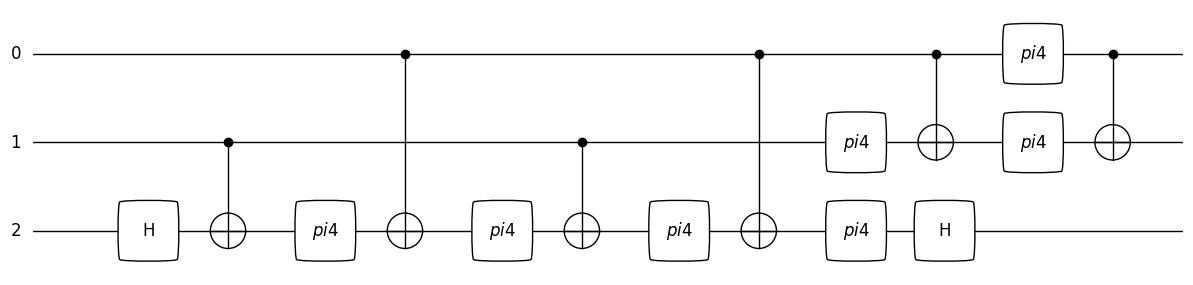

In [29]:
from geqo.visualization import plot_mpl

sim = ensembleSimulatorSymPy(0, 3)
plot_mpl(outputSequence, backend=sim, greek_symbol=True)

- we consider a sequence of 3 Toffoli gates
- each gate should be replaced by the replacement sequence

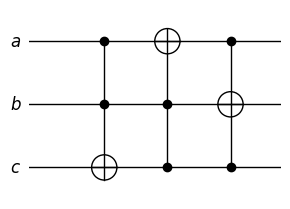

In [30]:
seq = Sequence(
    [],
    ["a", "b", "c"],
    [
        (Toffoli(), ["a", "b", "c"]),
        (Toffoli(), ["b", "c", "a"]),
        (Toffoli(), ["c", "a", "b"]),
    ],
)
sim = ensembleSimulatorSymPy(0, 3)
plot_mpl(seq, backend=sim, greek_symbol=True)

- we construct the replacement sequences for the first gate
- the qubits are matched automatically
- if there were parameters like rotation angles, these would also be matches automatically

In [31]:
newSeq1, subst1 = pat.replacer(
    Sequence([], ["a", "b", "c"], [(Toffoli(), ["a", "b", "c"])])
)

check sequence
run ix= 0
set qubits 0 to value a
set qubits 1 to value b
set qubits 2 to value c
res1/res2= True {}
res1/res2/resQ/resC= True {} {0: 'a', 1: 'b', 2: 'c'} {}
replace_recursion called for Sequence([], [0, 1, 2], [(Hadamard(), [2]), (CNOT(), [1, 2]), (InverseBasicGate("pi4", 1), [2]), (CNOT(), [0, 2]), (BasicGate("pi4", 1), [2]), (CNOT(), [1, 2]), (InverseBasicGate("pi4", 1), [2]), (CNOT(), [0, 2]), (BasicGate("pi4", 1), [1]), (BasicGate("pi4", 1), [2]), (CNOT(), [0, 1]), (Hadamard(), [2]), (BasicGate("pi4", 1), [0]), (InverseBasicGate("pi4", 1), [1]), (CNOT(), [0, 1])])
replace_recursion called for Hadamard()
replace_recursion called for CNOT()
replace_recursion called for InverseBasicGate("pi4", 1)
replace inverse basic gate
replace_recursion called for CNOT()
replace_recursion called for BasicGate("pi4", 1)
replace basic gate
replace_recursion called for CNOT()
replace_recursion called for InverseBasicGate("pi4", 1)
replace inverse basic gate
replace_recursion called fo

- we now replace the first gate with the sequence

we eliminate the indexes: [0]
place in: (Hadamard(), ['c'])
place in: (CNOT(), ['b', 'c'])
place in: (InverseBasicGate("pi4", 1), ['c'])
place in: (CNOT(), ['a', 'c'])
place in: (BasicGate("pi4", 1), ['c'])
place in: (CNOT(), ['b', 'c'])
place in: (InverseBasicGate("pi4", 1), ['c'])
place in: (CNOT(), ['a', 'c'])
place in: (BasicGate("pi4", 1), ['b'])
place in: (BasicGate("pi4", 1), ['c'])
place in: (CNOT(), ['a', 'b'])
place in: (Hadamard(), ['c'])
place in: (BasicGate("pi4", 1), ['a'])
place in: (InverseBasicGate("pi4", 1), ['b'])
place in: (CNOT(), ['a', 'b'])


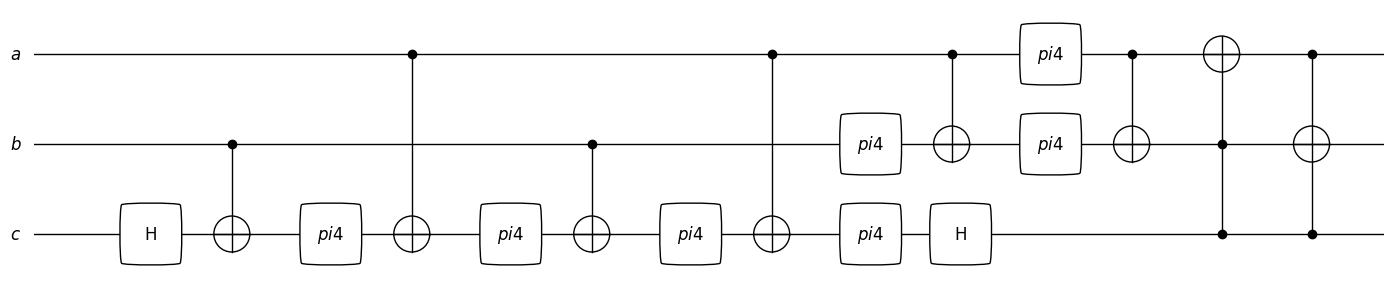

In [32]:
indexes = [0]  # Replace the first Toffoli

startIndex = 0  # We started here
print("we eliminate the indexes:", indexes)
newGatesAndTargets = []
for gi in range(len(seq.gatesAndTargets)):
    # The first hit with our pattern is replaces
    if gi == min(indexes):
        # We have to place the substitution circuit here.
        for g in newSeq1.gatesAndTargets:
            print("place in:", g)
            newGatesAndTargets.append(g)

    if gi not in indexes:
        newGatesAndTargets.append(seq.gatesAndTargets[gi])

replacesSeq = Sequence(seq.bits, seq.qubits, newGatesAndTargets)

sim = ensembleSimulatorSymPy(0, 3)
plot_mpl(replacesSeq, backend=sim, greek_symbol=True)

- we now create the replacement gates for the second Toffoli gate

In [33]:
newSeq2, subst2 = pat.replacer(
    Sequence([], ["a", "b", "c"], [(Toffoli(), ["b", "c", "a"])])
)

check sequence
run ix= 0
set qubits 0 to value b
set qubits 1 to value c
set qubits 2 to value a
res1/res2= True {}
res1/res2/resQ/resC= True {} {0: 'b', 1: 'c', 2: 'a'} {}
replace_recursion called for Sequence([], [0, 1, 2], [(Hadamard(), [2]), (CNOT(), [1, 2]), (InverseBasicGate("pi4", 1), [2]), (CNOT(), [0, 2]), (BasicGate("pi4", 1), [2]), (CNOT(), [1, 2]), (InverseBasicGate("pi4", 1), [2]), (CNOT(), [0, 2]), (BasicGate("pi4", 1), [1]), (BasicGate("pi4", 1), [2]), (CNOT(), [0, 1]), (Hadamard(), [2]), (BasicGate("pi4", 1), [0]), (InverseBasicGate("pi4", 1), [1]), (CNOT(), [0, 1])])
replace_recursion called for Hadamard()
replace_recursion called for CNOT()
replace_recursion called for InverseBasicGate("pi4", 1)
replace inverse basic gate
replace_recursion called for CNOT()
replace_recursion called for BasicGate("pi4", 1)
replace basic gate
replace_recursion called for CNOT()
replace_recursion called for InverseBasicGate("pi4", 1)
replace inverse basic gate
replace_recursion called fo

- we replace the first remaining Toffoli gate with the appropriate sequence

we eliminate the indexes: [15]
place in: (Hadamard(), ['a'])
place in: (CNOT(), ['c', 'a'])
place in: (InverseBasicGate("pi4", 1), ['a'])
place in: (CNOT(), ['b', 'a'])
place in: (BasicGate("pi4", 1), ['a'])
place in: (CNOT(), ['c', 'a'])
place in: (InverseBasicGate("pi4", 1), ['a'])
place in: (CNOT(), ['b', 'a'])
place in: (BasicGate("pi4", 1), ['c'])
place in: (BasicGate("pi4", 1), ['a'])
place in: (CNOT(), ['b', 'c'])
place in: (Hadamard(), ['a'])
place in: (BasicGate("pi4", 1), ['b'])
place in: (InverseBasicGate("pi4", 1), ['c'])
place in: (CNOT(), ['b', 'c'])


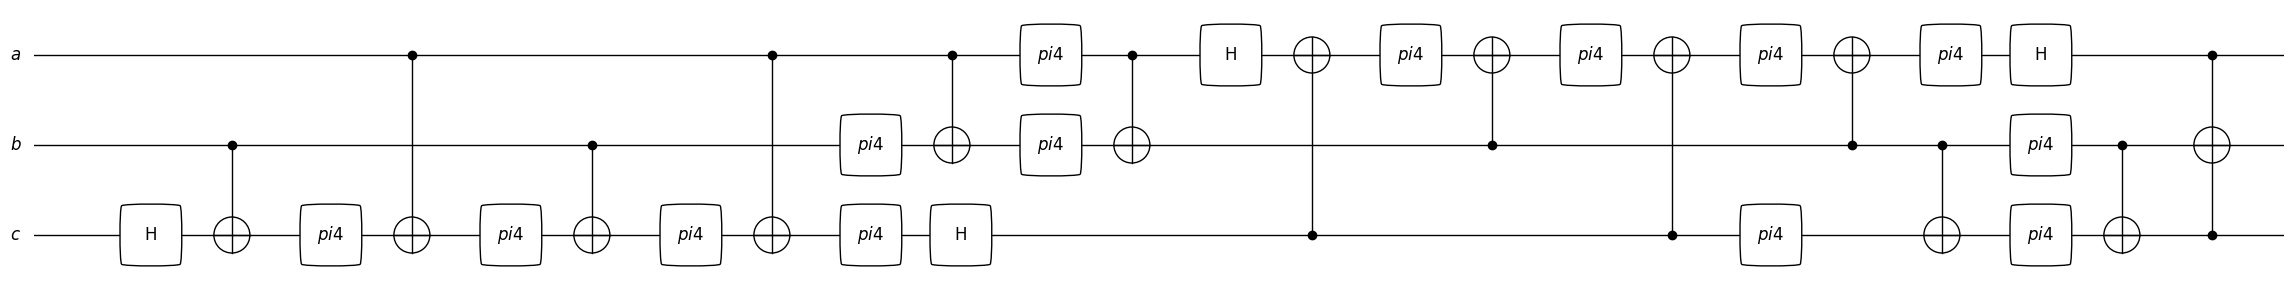

In [34]:
indexes = [15]  # Replace the first Toffoli

startIndex = 0  # We started here
print("we eliminate the indexes:", indexes)
newGatesAndTargets = []
for gi in range(len(replacesSeq.gatesAndTargets)):
    # The first hit with our pattern is replaces
    if gi == min(indexes):
        # We have to place the substitution circuit here.
        for g in newSeq2.gatesAndTargets:
            print("place in:", g)
            newGatesAndTargets.append(g)

    if gi not in indexes:
        newGatesAndTargets.append(replacesSeq.gatesAndTargets[gi])

replacesSeq = Sequence(replacesSeq.bits, replacesSeq.qubits, newGatesAndTargets)

sim = ensembleSimulatorSymPy(0, 3)
plot_mpl(replacesSeq, backend=sim, greek_symbol=True)

- we create the replacement sequence for the remaining Toffoli gate

In [35]:
newSeq3, subst3 = pat.replacer(
    Sequence([], ["a", "b", "c"], [(Toffoli(), ["c", "a", "b"])])
)

check sequence
run ix= 0
set qubits 0 to value c
set qubits 1 to value a
set qubits 2 to value b
res1/res2= True {}
res1/res2/resQ/resC= True {} {0: 'c', 1: 'a', 2: 'b'} {}
replace_recursion called for Sequence([], [0, 1, 2], [(Hadamard(), [2]), (CNOT(), [1, 2]), (InverseBasicGate("pi4", 1), [2]), (CNOT(), [0, 2]), (BasicGate("pi4", 1), [2]), (CNOT(), [1, 2]), (InverseBasicGate("pi4", 1), [2]), (CNOT(), [0, 2]), (BasicGate("pi4", 1), [1]), (BasicGate("pi4", 1), [2]), (CNOT(), [0, 1]), (Hadamard(), [2]), (BasicGate("pi4", 1), [0]), (InverseBasicGate("pi4", 1), [1]), (CNOT(), [0, 1])])
replace_recursion called for Hadamard()
replace_recursion called for CNOT()
replace_recursion called for InverseBasicGate("pi4", 1)
replace inverse basic gate
replace_recursion called for CNOT()
replace_recursion called for BasicGate("pi4", 1)
replace basic gate
replace_recursion called for CNOT()
replace_recursion called for InverseBasicGate("pi4", 1)
replace inverse basic gate
replace_recursion called fo

- finally, we can replace the last of the Toffoli gates with the sequence

we eliminate the indexes: [30]
place in: (Hadamard(), ['b'])
place in: (CNOT(), ['a', 'b'])
place in: (InverseBasicGate("pi4", 1), ['b'])
place in: (CNOT(), ['c', 'b'])
place in: (BasicGate("pi4", 1), ['b'])
place in: (CNOT(), ['a', 'b'])
place in: (InverseBasicGate("pi4", 1), ['b'])
place in: (CNOT(), ['c', 'b'])
place in: (BasicGate("pi4", 1), ['a'])
place in: (BasicGate("pi4", 1), ['b'])
place in: (CNOT(), ['c', 'a'])
place in: (Hadamard(), ['b'])
place in: (BasicGate("pi4", 1), ['c'])
place in: (InverseBasicGate("pi4", 1), ['a'])
place in: (CNOT(), ['c', 'a'])


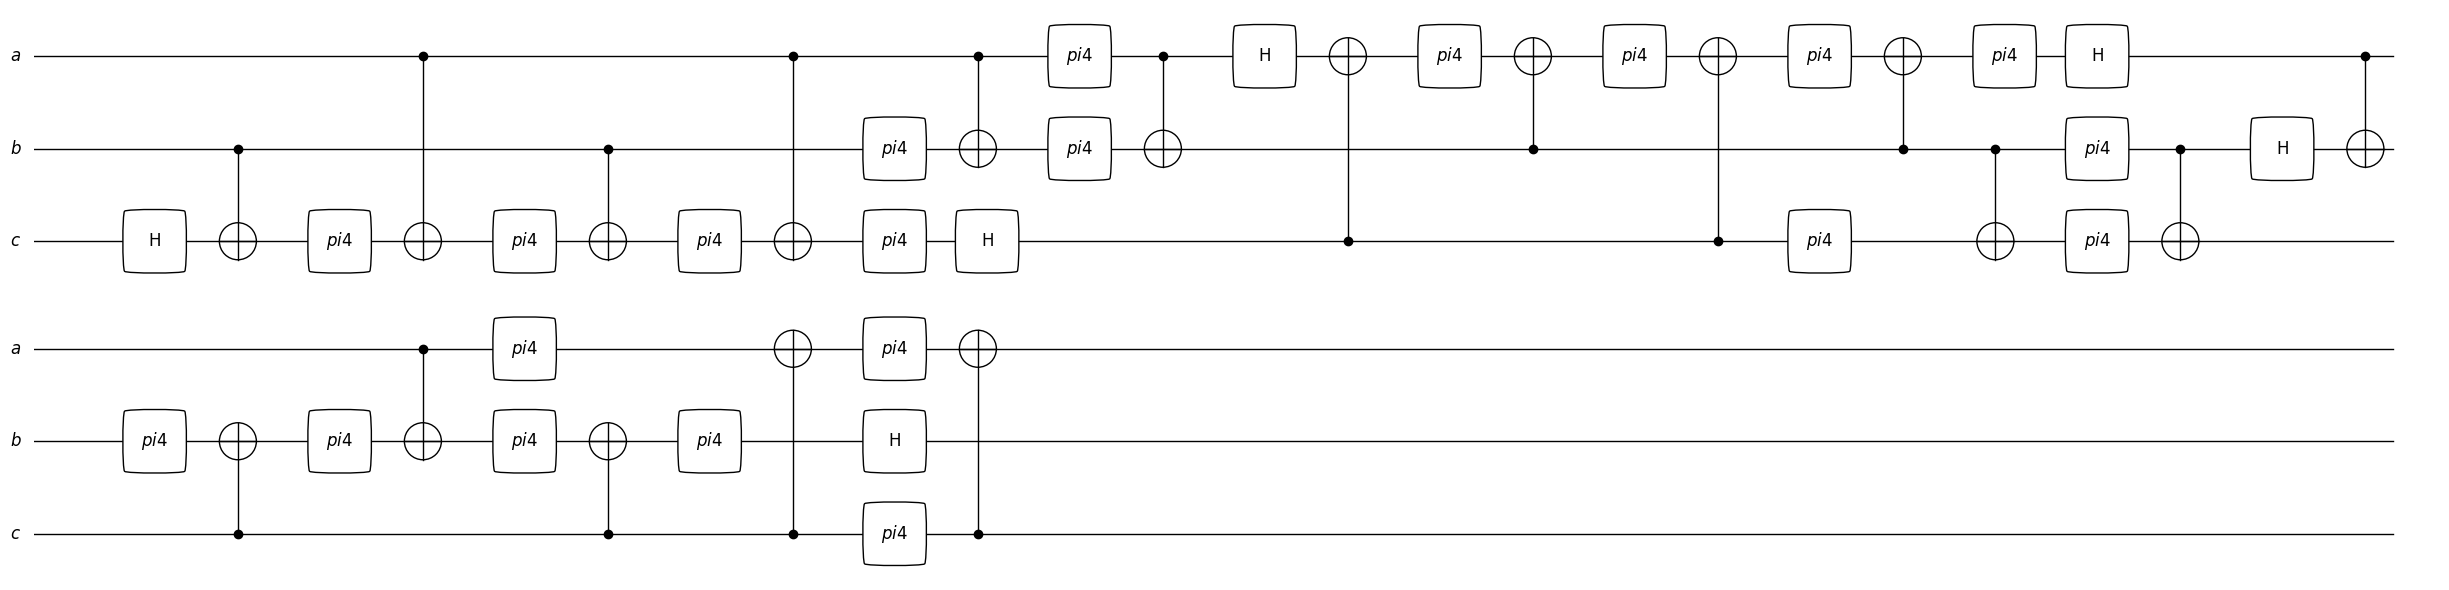

In [36]:
indexes = [30]  # Replace the first Toffoli

startIndex = 0  # We started here
print("we eliminate the indexes:", indexes)
newGatesAndTargets = []
for gi in range(len(replacesSeq.gatesAndTargets)):
    # The first hit with our pattern is replaces
    if gi == min(indexes):
        # We have to place the substitution circuit here.
        for g in newSeq3.gatesAndTargets:
            print("place in:", g)
            newGatesAndTargets.append(g)

    if gi not in indexes:
        newGatesAndTargets.append(replacesSeq.gatesAndTargets[gi])

replacesSeq = Sequence(replacesSeq.bits, replacesSeq.qubits, newGatesAndTargets)

sim = ensembleSimulatorSymPy(0, 3)
plot_mpl(replacesSeq, backend=sim, greek_symbol=True)